# Multiple Linear Regression for Condo Price Prediction

## 1. Import Required Libraries
Import pandas, numpy, scikit-learn, and matplotlib for data manipulation, modeling, and visualization.

In [17]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## 2. Load and Inspect CleanData_Final CSV
Load the CleanData_Final - Condo_CleanFinal.csv file and display the first few rows to inspect the data.

In [ ]:
# Load the CSV file
data = pd.read_csv('Data_Cleaned.csv')
data.head()

,Price,Square Area,Bedrooms,Bathrooms,Furnishing,school,hospital,shopping_mall,supermarket,church,...,Neighborhood_Santa Mesa Heights,Neighborhood_Santolan,Neighborhood_Timog and South Triangle,occupancy,Fully Furnished,Semi Furnished,Unfurnished,price_per_sqm,price_per_sqm_x_bedrooms,price_per_sqm_x_bathrooms
0,12000,25.0,0,1,Semi Furnished,1,1,1,1,1,...,0,0,0,0,0,1,0,480.000000,0.000000,480.000000
1,58000,61.0,1,1,Fully Furnished,1,1,1,1,1,...,0,0,0,0,1,0,0,950.819672,950.819672,950.819672
2,14000,25.0,1,1,Fully Furnished,1,1,1,1,1,...,0,0,0,1,1,0,0,560.000000,560.000000,560.000000
3,22000,28.0,0,1,Fully Furnished,1,1,1,1,1,...,0,0,0,0,1,0,0,785.714286,0.000000,785.714286
4,18000,30.0,2,1,Unfurnished,1,1,1,1,1,...,0,0,0,0,0,0,1,600.000000,1200.000000,600.000000


## 3. Preprocess Data (Handle Missing Values)
Check for missing values and encode categorical variables as needed.

In [19]:
# Check for missing values
data.info()
data.isnull().sum()

# Drop Furnishing column since it was already one hot encoded
data = data.drop(columns=['Furnishing'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419 entries, 0 to 2418
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Price                                  2419 non-null   int64  
 1   Square Area                            2419 non-null   float64
 2   Bedrooms                               2419 non-null   int64  
 3   Bathrooms                              2419 non-null   int64  
 4   Furnishing                             2419 non-null   object 
 5   school                                 2419 non-null   int64  
 6   hospital                               2419 non-null   int64  
 7   shopping_mall                          2419 non-null   int64  
 8   supermarket                            2419 non-null   int64  
 9   church                                 2419 non-null   int64  
 10  park                                   2419 non-null   int64  
 11  gym 

## 4. Select Features and Target Variable
Identify and select relevant features for predicting Condo Price. Set Condo Price as the target variable.

In [20]:
# Set target and features
# Replace 'Condo Price' with the actual column name if different
target = 'Price'
X = data.drop(target, axis=1)
y = data[target]

X.head(), y.head()

(   Square Area  Bedrooms  Bathrooms  school  hospital  shopping_mall  \
 0         25.0         0          1       1         1              1   
 1         61.0         1          1       1         1              1   
 2         25.0         1          1       1         1              1   
 3         28.0         0          1       1         1              1   
 4         30.0         2          1       1         1              1   
 
    supermarket  church  park  gym  ...  Neighborhood_Santa Mesa Heights  \
 0            1       1     1    1  ...                                0   
 1            1       1     1    1  ...                                0   
 2            1       1     1    1  ...                                0   
 3            1       1     1    1  ...                                0   
 4            1       1     1    1  ...                                0   
 
    Neighborhood_Santolan  Neighborhood_Timog and South Triangle  occupancy  \
 0                     

## 5. Split Data into Training and Test Sets
Use train_test_split from scikit-learn to split the data into training and test sets.

In [21]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (1935, 54) (1935,)
Test set: (484, 54) (484,)


## 6. Train Multiple Linear Regression Model
Fit a Multiple Linear Regression model using the training data.

In [22]:
# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

## 7. Evaluate Model Performance 


In [23]:
# Evaluate model performance
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2%}')
if r2 >= 0.90:
    print('Goal achieved!')
else:
    print('Goal not achieved.')

R² Score: 90.30%
Goal achieved!


## 8. Visualize Predictions vs Actual Condo Prices
Plot predicted vs actual Condo Prices to visually assess model performance.

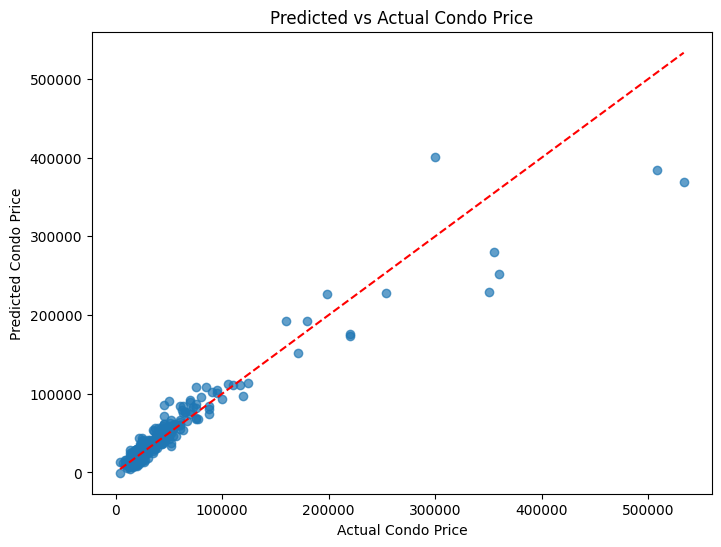

In [24]:
# Visualize predictions vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Condo Price')
plt.ylabel('Predicted Condo Price')
plt.title('Predicted vs Actual Condo Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Regression Visualizations
The following plots help evaluate the performance of your multiple linear regression model:

In [ ]:
# Predicted vs Actual values scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these with your actual variable names
y_true = y_test  # Actual values
y_pred = model.predict(X_test)  # Predicted values

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_true, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.show()

In [ ]:
# Residuals plot (Residuals vs Predicted values)
residuals = y_true - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [ ]:
# Histogram of residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()